### What the Data Says About Heart Disease: An Exploratory Analysis

#### Background:
Heart disease, also known as cardiovascular disease, is a broad term that encompasses various conditions affecting the heart and circulatory system. It is a leading cause of disability worldwide. Because the heart is one of the body’s most essential organs, its disorders can impact other organs and body systems as well. There are many types and forms of heart disease, with the most common involving the narrowing or blockage of coronary arteries, valve dysfunction, enlargement of the heart, and other issues that can result in heart attacks or heart failure. [Source](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-%28cvds%29?)

![](https://aparanthospital.com/images/heart-disease-treatment.jpg)

### Table of Content
1. [Dataset Description](#Dataset-Description)
2. [Objective](#Objective)
3. [Importing Libraries](#Importing-Libraries)
4. [Reading Dataset](#Reading-Dataset)
5. [Data Glossary](#Data-Glossary)
6. [Data Cleaning](#Data-Cleaning)
7. [Renaming Columns](#Renaming-Columns)
8. [Statistical Summary of the Heart Data](#Statistical-Summary-of-the-Heart-Data)
9. [Distribution of Numerical Fetures](#Distribution-of-Numerical-Features)
10. [Categorical Features](#Categorical-Features)
11. [Categorical Heatmaps](#Categorical-Heatmaps)
12. [Pearson Correlation](#Pearson-Correlation)
13. [Summary](#Summary)
14. [Recommendation and Next Steps](#Recommendation-and-Next-Steps)


#### Dataset Description:
This dataset originates from 1988 and includes data collected from four sources: `Cleveland, Hungary, Switzerland, and Long Beach V`. It contains 76 attributes in total, including the target variable; however, most published studies typically utilize a subset of 14 of these features. The “target” variable indicates whether a patient has heart disease, represented as an `integer — 0 for no disease and 1 for presence of disease`.

#### Objective: 
The ojective of this project is to use exploratory analysis to determine heart disease prdeictors using the provided dataset.

Data Source: [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

#### Summary of Findings
It turns out that how the heart performs under stress, like during exercise, tells us more about heart disease than just resting numbers like blood pressure or cholesterol. These findings match what we know in real life and can help doctors and researchers focus on the most important warning signs when checking for heart problems.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
mypal= ['#54BEBE', '#BADBDB', '#DF979E','#98D1D1', '#C80064','#D7658B']

### Reading Dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Display column data types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Glossary
- age: age in years
- sex: gender
     - 1 = male
     - 0 = female
- cp: chest pain type
    - value 0: typical angina
    - value 1: atypical angina
    - value 2: non-anginal pain
    - value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true
    - 0 = false
- restecg: resting electrocardiographic results
    - value 0: normal
    - value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - 1 = yes
    - 0 = no
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - value 0: upsloping
    - value 1: flat
    - value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal:
   - 0 = error (in the original dataset 0 maps to NaN's)
   - 1 = fixed defect
   - 2 = normal
   - 3 = reversable defect
- target (the label):
    - 0 = no disease,
    - 1 = disease

### Note: 

Regarding the target label, the designated integers describe the diagnosis of heart disease which is thw angiographic disease status:
Value 0: means < 50% diameter narrowing and;
Value 1: means > 50% diameter narrowing

### Also from the discussion forum of the dataset, the following was noted:

- Data #93, 159, 164, 165 and 252 have ca = 4 which is incorrect. In the original Cleveland dataset they are NaNs.
- data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
Therefore the afftected data will be dropped. (7 data entry will be dropped)

## Data Cleaning
As initially observed, seven data entry will be dropped.

In [5]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value

In [6]:
data.info()

print(f'The length of the data now is now {len(data)} instead of 303!')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    int64  
 2   cp        296 non-null    int64  
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    int64  
 6   restecg   296 non-null    int64  
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    int64  
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    int64  
 11  ca        296 non-null    int64  
 12  thal      296 non-null    int64  
 13  target    296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB
The length of the data now is now 296 instead of 303!


### Renaming Columns

The dataset’s feature names are abbreviated, which makes them difficult to interpret. Even the full medical or technical terms can be complex, so to make the data more readable, I’ll rename the dataframe’s columns using the detailed descriptions provided by the UCI data repository. In addition, I’ll replace the numerical category codes (0, 1, 2, etc.) with their corresponding medical meanings (for example, ‘typical angina’, ‘atypical angina’, and so on).

In [7]:
# Rename the columns for readability
data = data.rename(
    columns = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_electrocardiogram',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression_exercise',
    'slope': 'st_segment_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'heart_disease_presence'},
  errors = 'raise')

In [8]:
heart_data = data.copy()

In [9]:
#Replacing categorical codes 
heart_data['sex'] = heart_data['sex'].replace({0: 'female', 1: 'male'})
heart_data['chest_pain_type'] = heart_data['chest_pain_type'].replace({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
})

heart_data['fasting_blood_sugar'] = heart_data['fasting_blood_sugar'].replace({
    0: 'lower than 120mg/ml',
    1: 'greater than 120mg/ml'
})

heart_data['resting_electrocardiogram'] = heart_data['resting_electrocardiogram'].replace({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

heart_data['exercise_induced_angina'] = heart_data['exercise_induced_angina'].replace({
    0: 'no',
    1: 'yes'
})

heart_data['st_segment_Slope'] = heart_data['st_segment_slope'].replace({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})

heart_data['thalassemia'] = heart_data['thalassemia'].replace({
    1: 'normal',
    2: 'fixed defect',
    3: 'reversible defect'
})


In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        296 non-null    int64  
 1   sex                        296 non-null    object 
 2   chest_pain_type            296 non-null    object 
 3   resting_blood_pressure     296 non-null    int64  
 4   serum_cholesterol          296 non-null    int64  
 5   fasting_blood_sugar        296 non-null    object 
 6   resting_electrocardiogram  296 non-null    object 
 7   max_heart_rate             296 non-null    int64  
 8   exercise_induced_angina    296 non-null    object 
 9   st_depression_exercise     296 non-null    float64
 10  st_segment_slope           296 non-null    int64  
 11  num_major_vessels          296 non-null    int64  
 12  thalassemia                296 non-null    object 
 13  heart_disease_presence     296 non-null    int64  

In [11]:
heart_data.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate,exercise_induced_angina,st_depression_exercise,st_segment_slope,num_major_vessels,thalassemia,heart_disease_presence,st_segment_Slope
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1,upsloping
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1,upsloping
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,2,0,fixed defect,1,downsloping
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,2,0,fixed defect,1,downsloping
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,2,0,fixed defect,1,downsloping
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,1,0,normal,1,flat
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,1,0,fixed defect,1,flat
7,44,male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,2,0,reversible defect,1,downsloping
8,52,male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,2,0,reversible defect,1,downsloping
9,57,male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,2,0,fixed defect,1,downsloping


### Statistical Summary of the Heart Data

To gain a quick overview of the dataset’s numerical features, the **`.describe()`** function will be used. This method generates key summary statistics such as **count**, **mean**, **standard deviation**, **minimum**, **maximum**, and the **quartile (25%, 50%, 75%) values** for each numeric column.

This summary helps identify data distribution patterns, detect potential outliers, and understand the overall range and central tendency of each feature — all of which are essential for exploring the characteristics of patients in the heart disease dataset.


In [12]:
heart_data.describe()

,age,resting_blood_pressure,serum_cholesterol,max_heart_rate,st_depression_exercise,st_segment_slope,num_major_vessels,heart_disease_presence
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,1.395270,0.679054,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.618235,0.939726,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,2.000000,1.000000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,2.000000,3.000000,1.000000


The statistical summary of the heart dataset shows that the average patient age is about **54 years**, with ages ranging from **29 to 77**. The typical **resting blood pressure** is around **132 mmHg**, and **serum cholesterol** averages **247 mg/dL**, though some patients have extremely high levels reaching **564 mg/dL**, suggesting possible cholesterol-related risks. 

The **maximum heart rate achieved** averages **150 bpm**, indicating moderate cardiovascular performance across the group. The **ST depression** values vary widely, from **0.0 to 6.2**, reflecting differences in heart stress response during exercise. Most patients have **no major blood vessels** affected (median = 0), and about **54%** show signs of **heart disease**, highlighting a nearly even distribution between those with and without the condition. 

Overall, the data reflects a middle-aged population with a moderate prevalence of heart disease and a wide range of cardiovascular health indicators.


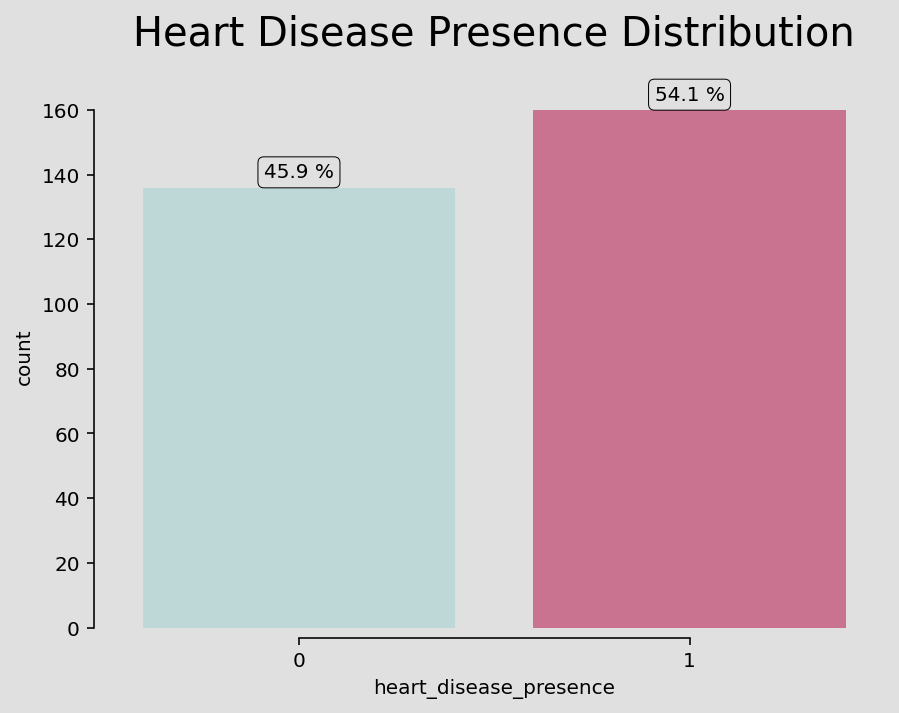

In [13]:
mypal= ['#54BEBE', '#BADBDB', '#DF979E','#98D1D1', '#C80064','#D7658B']
%config InlineBackend.figure_format = 'retina'


plt.figure(figsize=(7, 5),facecolor='#E0E0E0')
total = float(len(heart_data))
ax = sns.countplot(x=heart_data['heart_disease_presence'], palette=mypal[1::4])
ax.set_facecolor('#E0E0E0')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Heart Disease Presence Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

The dataset will be grouped into three categories- numerical features, single categorical features and multi-categorical features.

In [14]:
# numerical features
num_feats = ['age', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate', 'st_depression_exercise', 'num_major_vessels']
# single categorical features 
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'heart_disease_presence']
# caterorical (multi-categories)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_segment_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## Distribution of Numerical Features

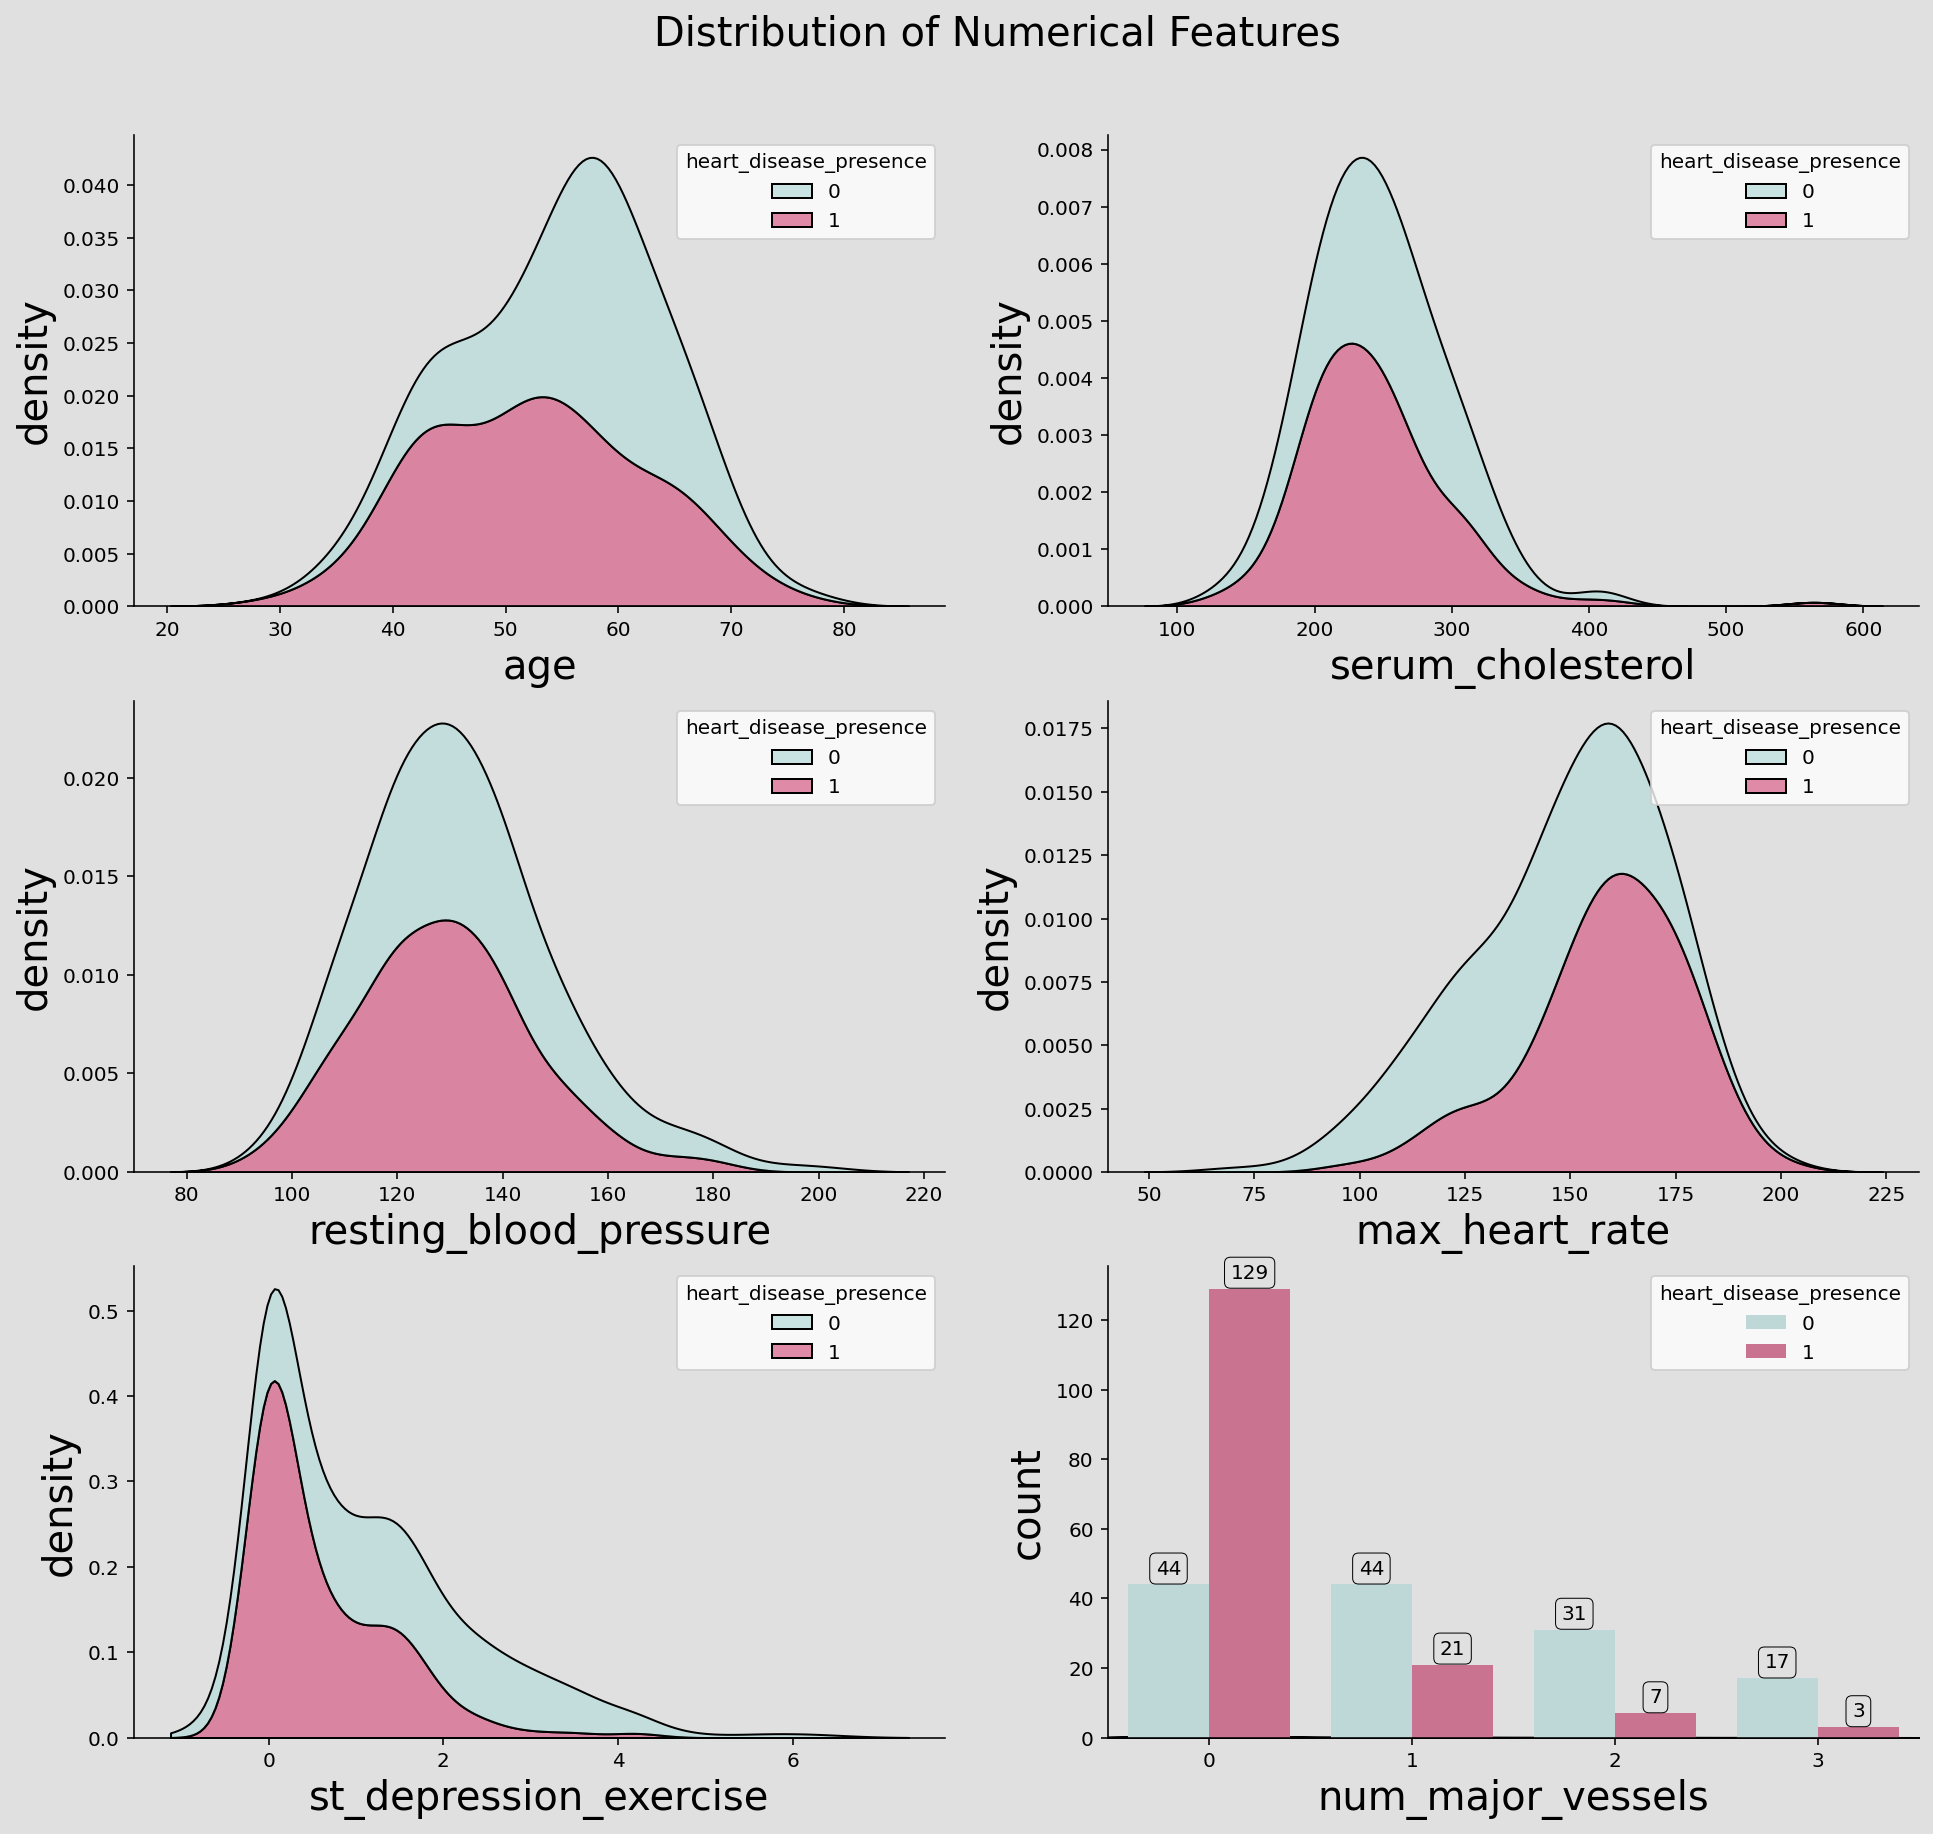

In [15]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#E0E0E0')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#E0E0E0')
    
    ax = sns.kdeplot(data=data, x=col, hue="heart_disease_presence", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="heart_disease_presence", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 20);
                            

### Pairplots

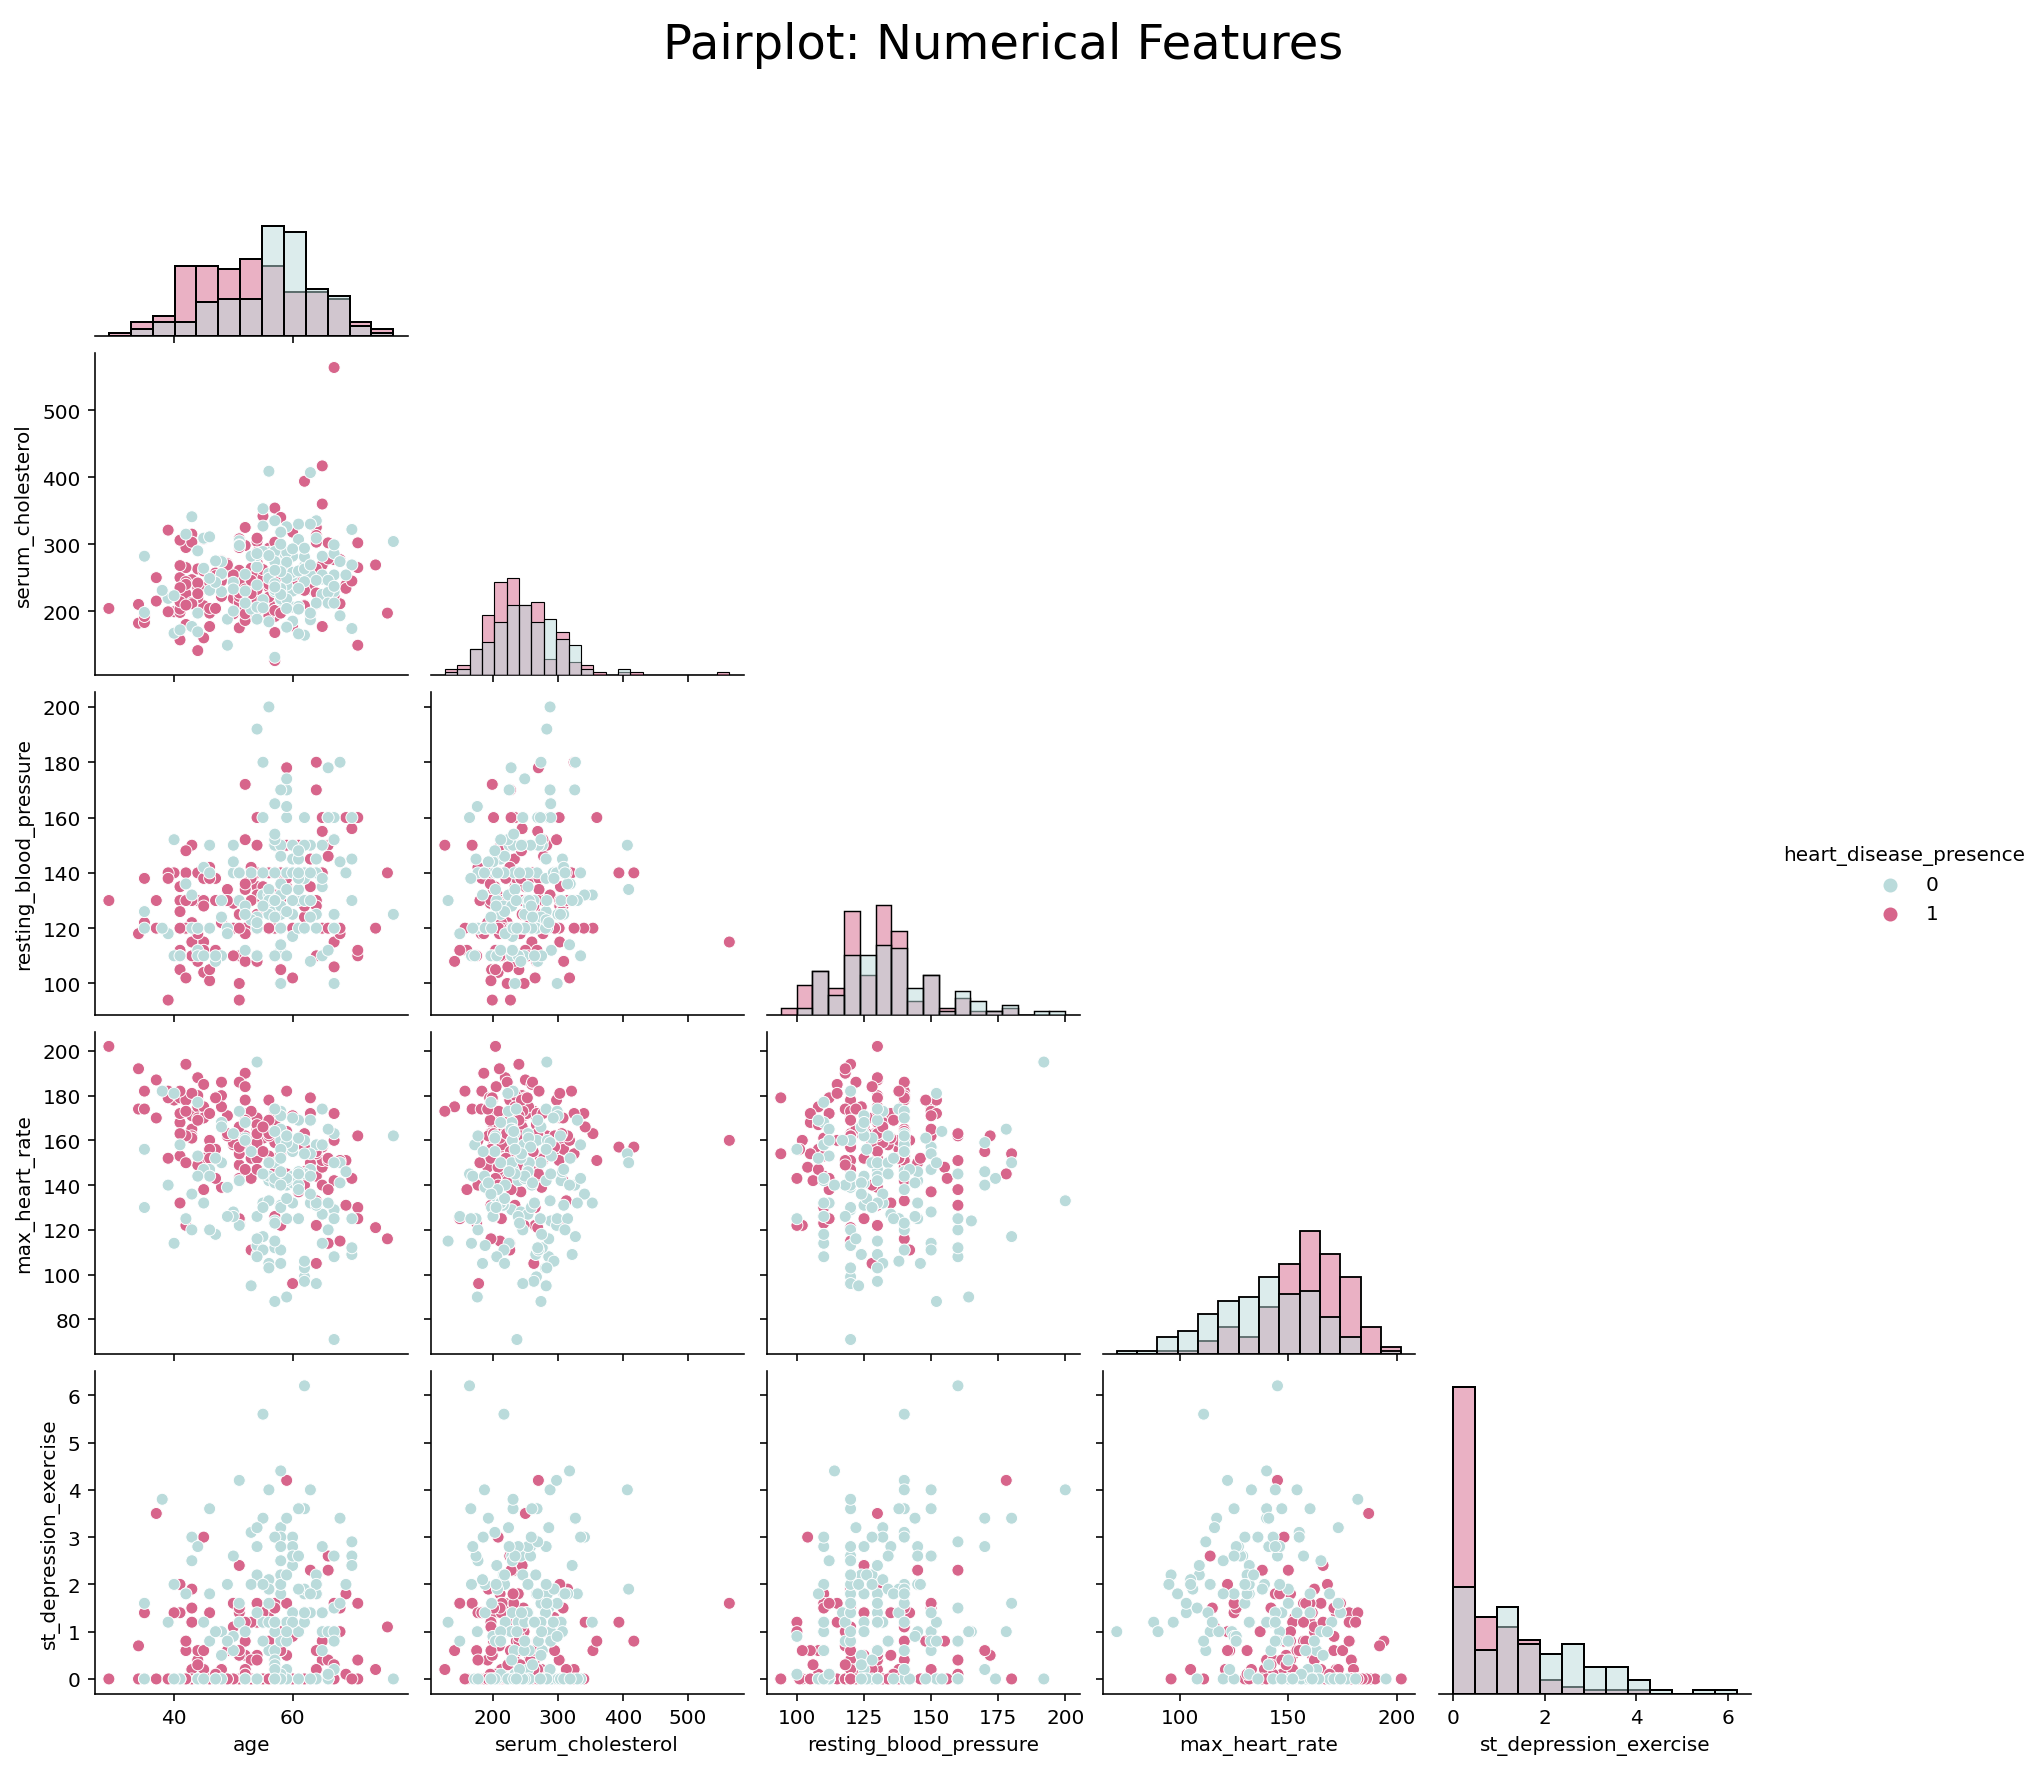

In [16]:
numerical_data = ['age', 'serum_cholesterol', 'resting_blood_pressure', 'max_heart_rate', 'st_depression_exercise', 'heart_disease_presence']
heart_numerical_data = heart_data[numerical_data]
numerical_plot = sns.pairplot(heart_numerical_data, hue="heart_disease_presence", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

### Summary of The Features Comparison from the Pairplots

* **Age**, **Resting_Blood_Pressure**, and **Serum_Cholesterol** show **weak positive correlations** with each other.
* **Max_Heart_Rate** tends to **decrease with age**, suggesting older individuals reach lower maximum heart rates.
* **ST_Depression_Exercise** shows **slight positive correlation with age** and **Resting_Blood_Pressure**.
* In terms of **heart disease presence**:

  * People with heart disease (pink) generally have **higher st depression** and **lower max heart rate**.
  * **Serum Cholesterol** and **Resting Blood Pressure** show **considerable overlap** between target groups, indicating limited discrimination.

**Summary:**
Heart disease is more associated with **higher st depression** and **lower max heart rate**, while other features like **serum cholesterol** and **blood pressure** show weaker separation between classes.


### Selected Features
Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

Except maximum_heart_rate_achieved, the others are positively and linearly related with age (albeit a weaker relation with st_depression).

Younger patients with higher maximum_heart_rate_achieved are more likely to have a heart condition.
Lower st_depression regardless of age is also likely an indication of a heart disease.

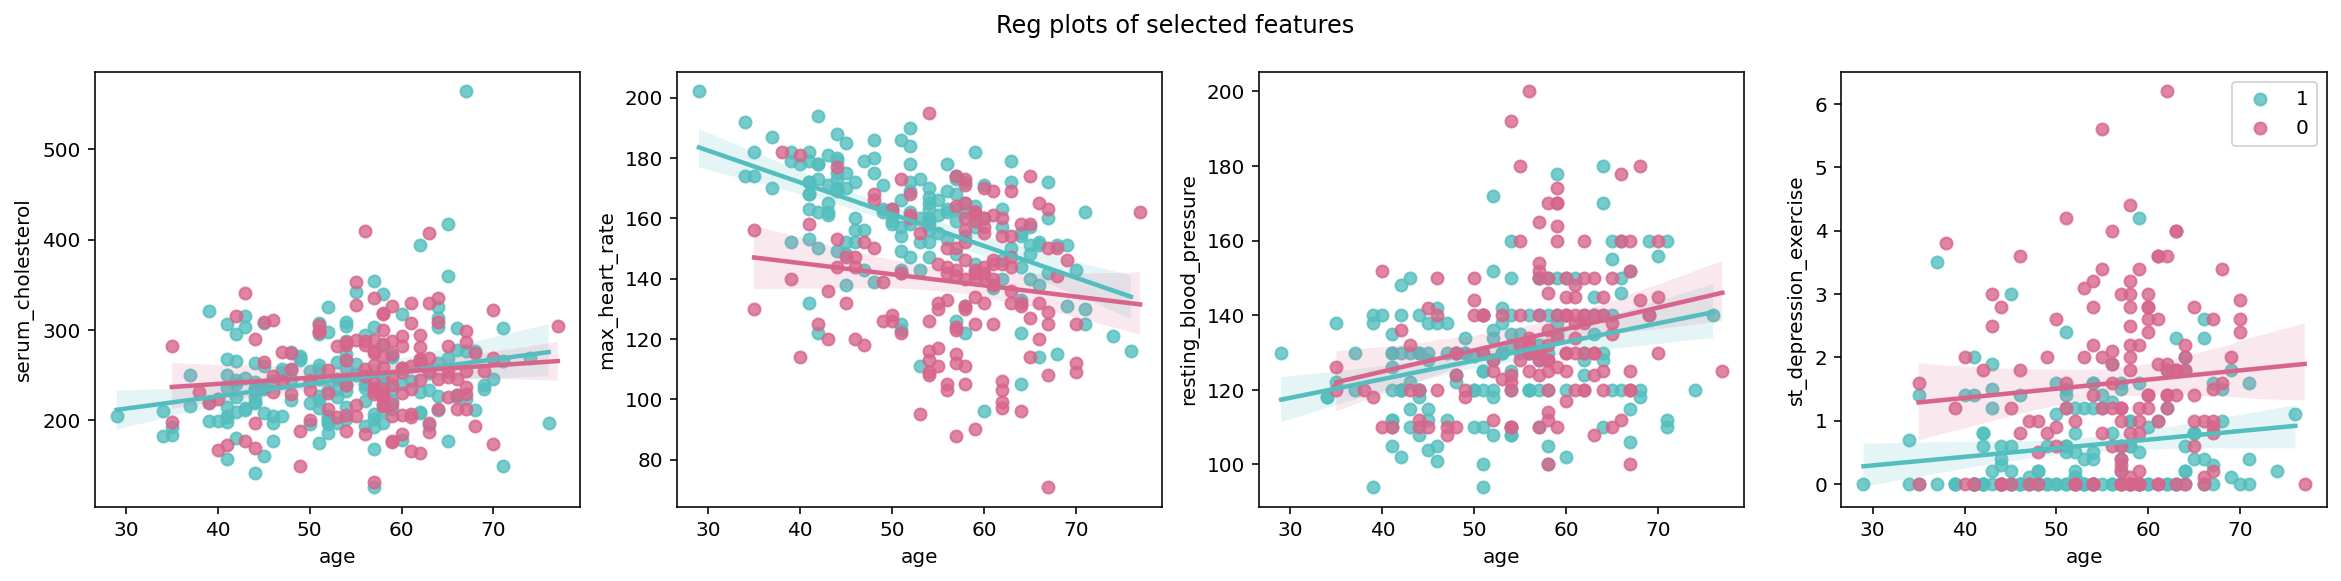

In [17]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==1], x='age', y='serum_cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==0], x='age', y='serum_cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==1], x='age', y='max_heart_rate', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==0], x='age', y='max_heart_rate', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==1], x='age', y='st_depression_exercise', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=heart_data[heart_data['heart_disease_presence'] ==0], x='age', y='st_depression_exercise', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

### Categorical Features
We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

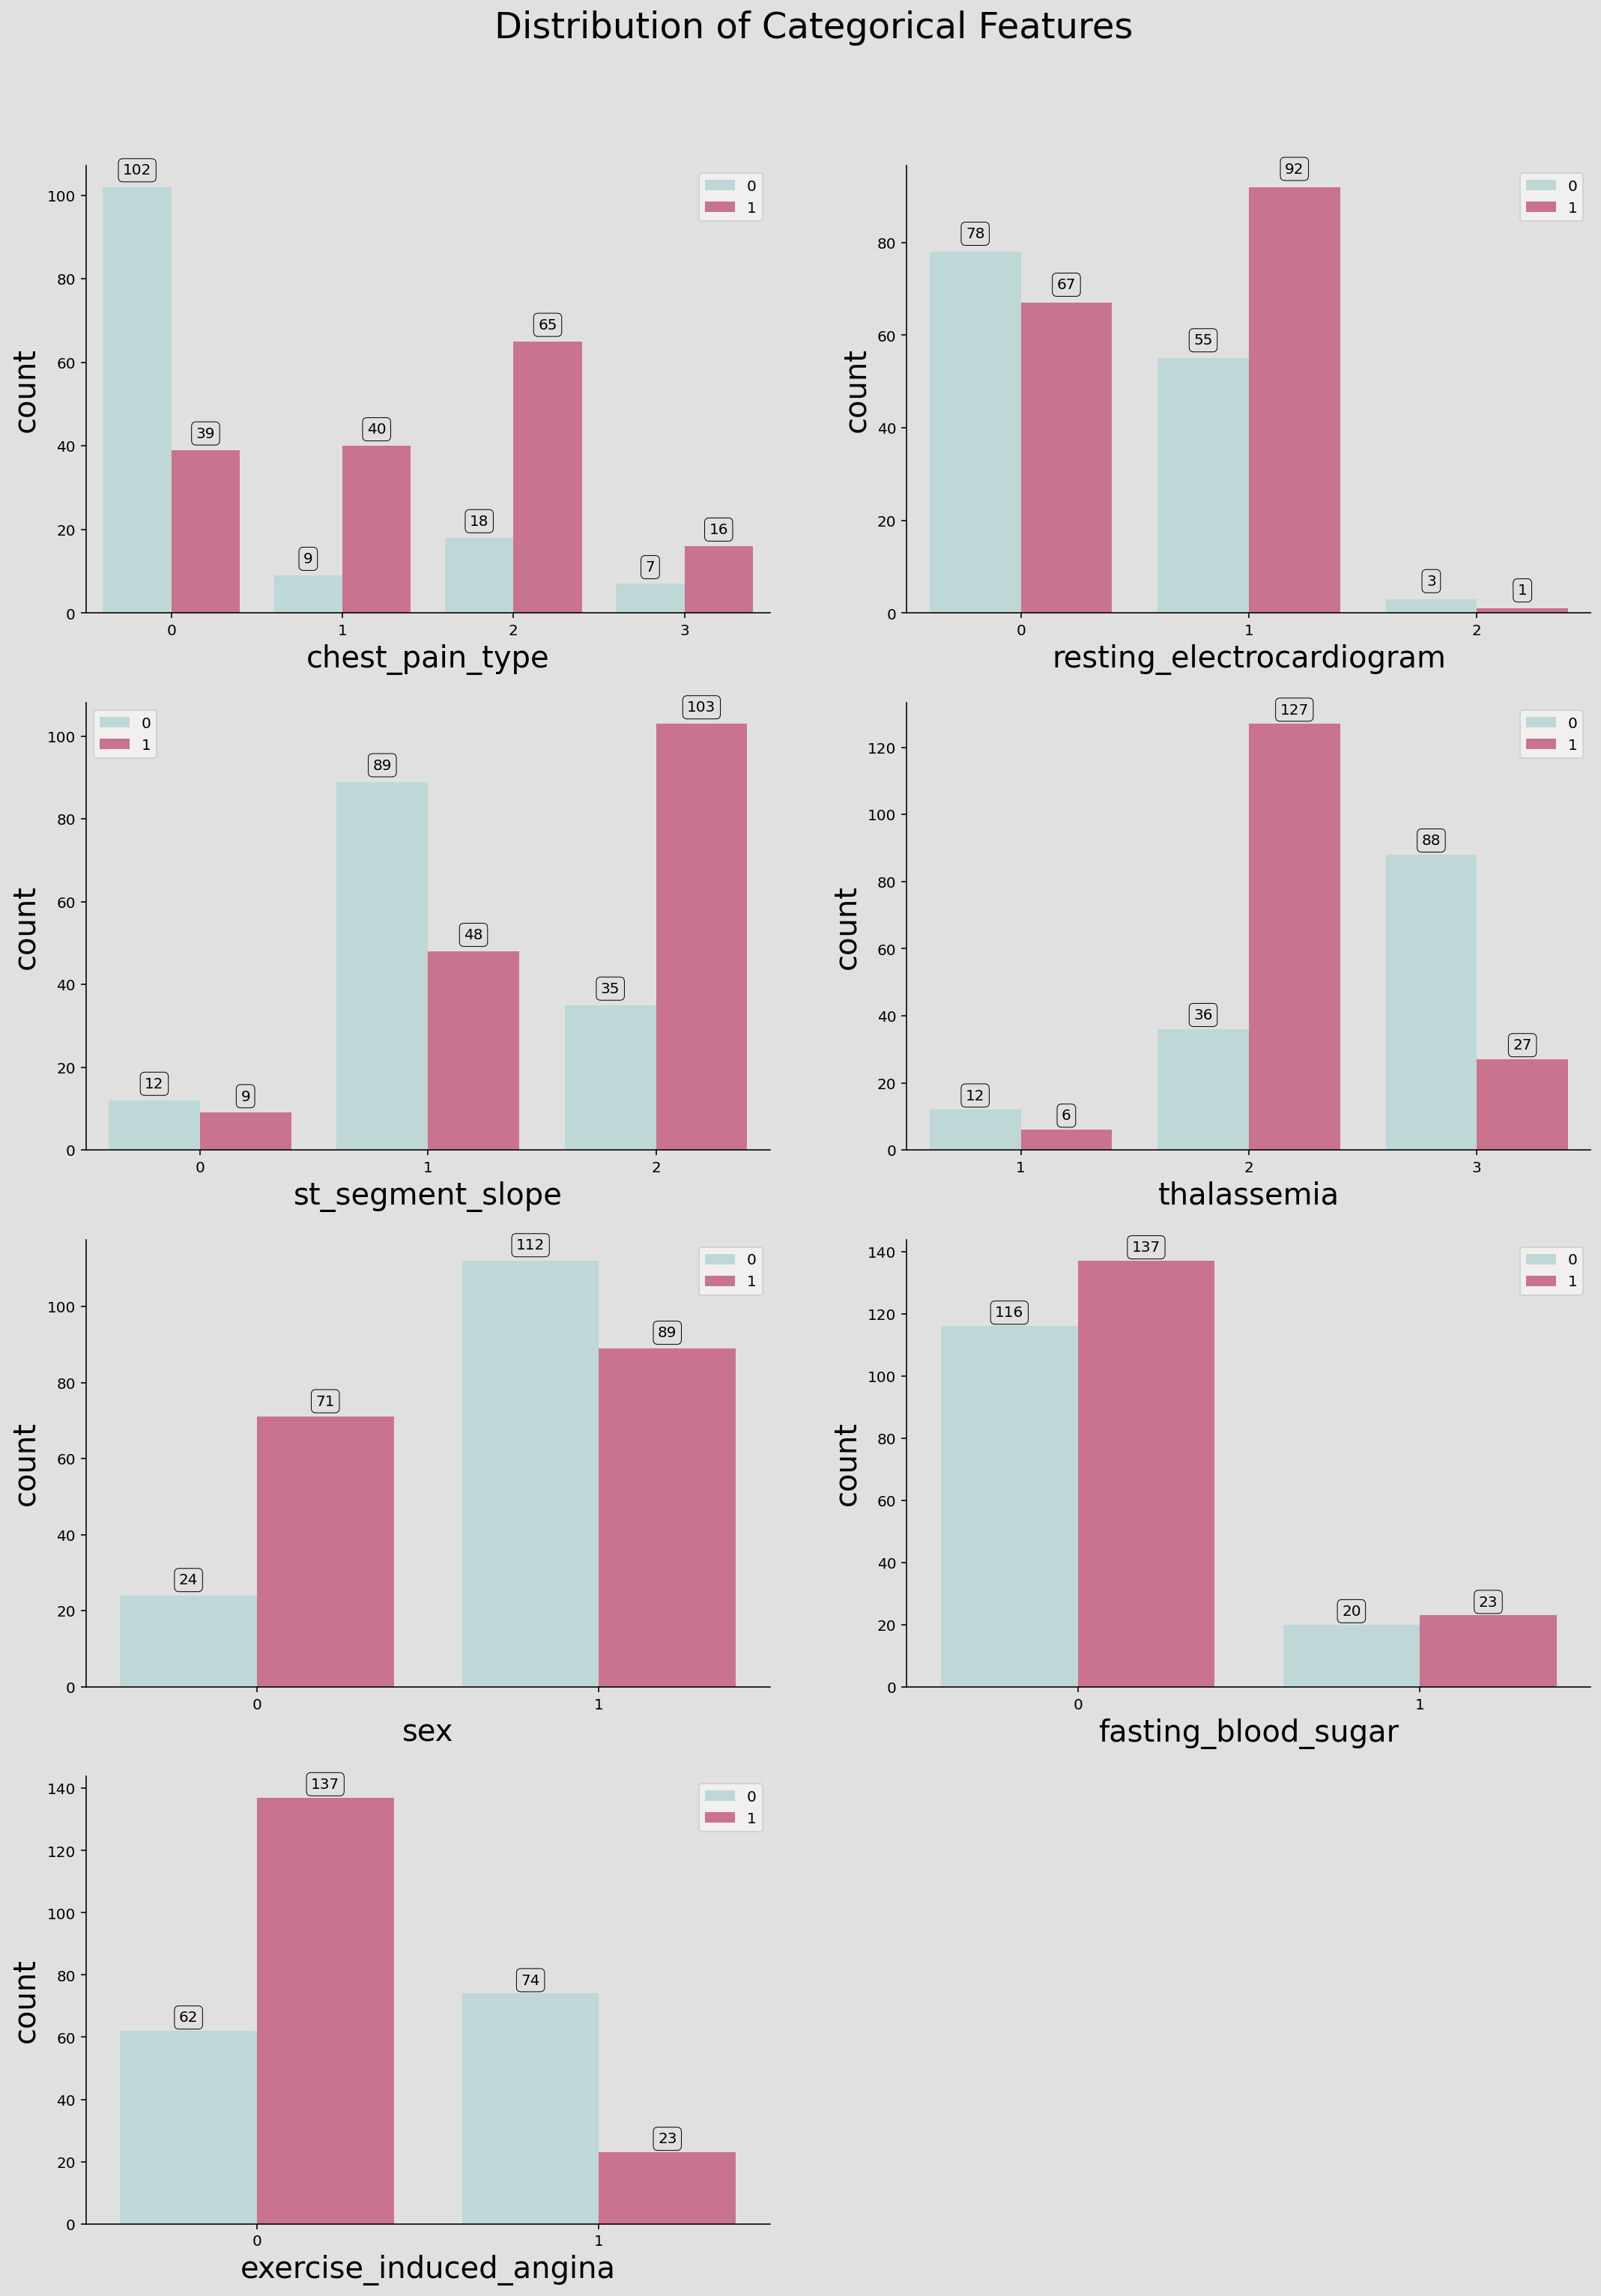

In [18]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#E0E0E0')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#E0E0E0')
        ax = sns.countplot(data=data, x=col, hue="heart_disease_presence", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

### Correlation Heatmaps
Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

## Pearson's correlation
The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.

In [19]:
num_corr = heart_data[numerical_data].corrwith(heart_data['heart_disease_presence'])
print(num_corr)

age                      -0.225453
serum_cholesterol        -0.076541
resting_blood_pressure   -0.148922
max_heart_rate            0.426655
st_depression_exercise   -0.428804
heart_disease_presence    1.000000
dtype: float64


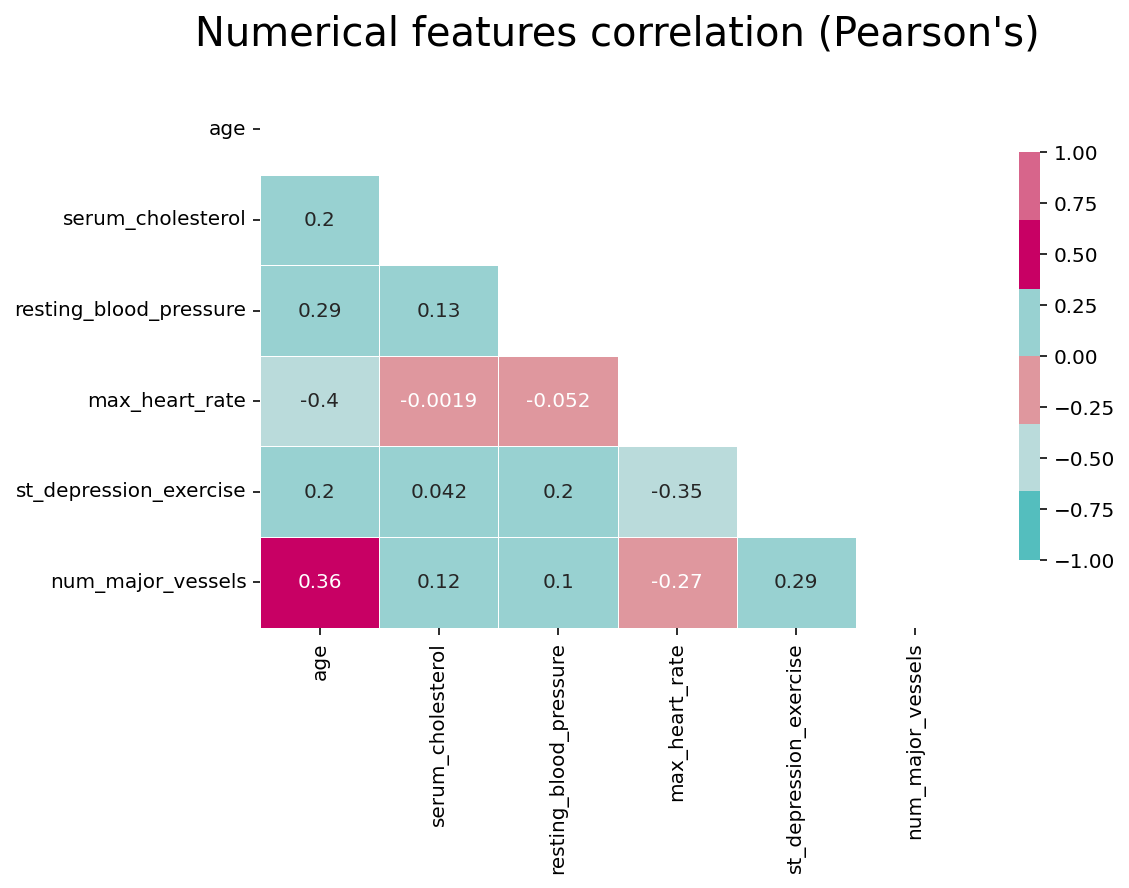

In [20]:
num_heart_data = heart_data[num_feats]
corr = num_heart_data.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

### Conclusion

From this analysis, we can see some clear patterns in what might be linked to heart disease.

The people in this dataset are mostly middle-aged, with an average age of around 54 years. About half of them have some form of heart disease, so the data gives a good balance between those who are healthy and those who are not. On average, their blood pressure and cholesterol levels are a bit high — something that’s often seen in people at risk for heart problems.

When we look closer at the numbers, two things stand out the most: maximum heart rate and ST depression during exercise. People with heart disease usually reach a lower maximum heart rate and have higher ST depression values, meaning their hearts respond differently under stress. On the other hand, things like cholesterol and resting blood pressure don’t show much difference between those with and without heart disease.

Looking at the categories, we also see some clear trends:

- Men are more likely to have heart disease than women.
- People with typical angina or asymptomatic chest pain are more likely to have the condition.
- Those who experience angina during exercise or have abnormal ECG results are also more likely to have heart disease.

Finally, the correlation heatmap shows that a higher ST depression and more blocked blood vessels are linked to heart disease, while a higher maximum heart rate is linked to a healthier heart.

### Recommendations and Next Steps

This analysis gave us a good picture of which factors are most linked to heart disease, but there is still more we can explore to learn even more from the data.

A good next step would be to build a simple prediction model to see how well we can guess whether someone might have heart disease based on their health information. Models like logistic regression or random forest could be a great starting point. Before doing that, the data would need a bit more preparation, such as turning text labels into numbers and making sure all features are on a similar scale.

It would also be useful to look more closely at which features have the biggest impact on the prediction. This could confirm which factors really matter most, for example, whether maximum heart rate and ST depression are the strongest signals, and might uncover new patterns we did not notice before.

Lastly, using a larger or more up-to-date dataset would help strengthen the findings and make them more reliable. It could also be interesting to compare results between different age groups or genders to see if certain patterns are more common in specific groups.

Overall, these next steps would help move from simply exploring the data to actually building tools that could help detect heart disease earlier and support better heart health decisions.